# The main jupyter notebook for group three

## What is done in this notebook

- Data Loading and Initial Exploration:
    - Load the dataset into a pandas DataFrame.
    - Display the first 5 rows and check the data types of all columns.
    - Identify and handle any missing values.
    - List all unique Country values in the dataset.

In [1]:
# Basic command
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# Open the File as a DataFram
df = pd.read_csv(r"/Users/gaetanomanzone/Desktop/microplastics_project/gmanzone/processed_microplastics.csv")

In [3]:
df.head(5)

,year,country,cheese,yoghurt,total_milk,fruits,refined_grains,whole_grains,nuts_and_seeds,total_processed_meats,...,fish,shellfish,eggs,total_salt,added_sugars,non-starchy_vegetables,potatoes,other_starchy_vegetables,beans_and_legumes,total_ug_per_kg
0,1990,Angola,0.191781,54.899739,96.602740,76.520548,481.297149,44.309838,2.849315,22.770109,...,53.013699,0.164384,1.041096,8.005259,32.547945,80.164384,8.109589,39.342466,19.835616,1043.279108
1,1990,Benin,0.054795,9.365946,18.410959,90.876712,534.256965,48.836323,19.561644,17.018264,...,18.794521,3.972603,2.849315,5.854497,8.246575,122.986301,0.000000,304.904110,21.178082,1241.656197
2,1990,Burkina Faso,0.273973,35.390618,56.027397,19.178082,213.170183,129.416119,28.465753,9.541329,...,4.684932,0.000000,6.767123,6.928378,9.534247,64.767123,2.219178,13.780822,32.520548,666.603927
3,1990,Central African Republic,0.000000,19.206478,48.000000,113.397260,285.035375,302.567776,23.506849,26.412094,...,13.917808,0.000000,1.123288,6.585071,19.698630,101.753425,0.575342,209.452055,12.821918,1237.339905
4,1990,Cote D'Ivoire,0.301370,2.220447,38.109589,37.013699,436.907598,25.220347,16.904110,2.459103,...,51.424658,0.493151,2.438356,9.660915,28.438356,151.150685,1.945205,676.575343,2.356164,1540.502458


In [4]:
# See the Columns
df.dtypes

year                          int64
country                      object
cheese                      float64
yoghurt                     float64
total_milk                  float64
fruits                      float64
refined_grains              float64
whole_grains                float64
nuts_and_seeds              float64
total_processed_meats       float64
unprocessed_red_meats       float64
fish                        float64
shellfish                   float64
eggs                        float64
total_salt                  float64
added_sugars                float64
non-starchy_vegetables      float64
potatoes                    float64
other_starchy_vegetables    float64
beans_and_legumes           float64
total_ug_per_kg             float64
dtype: object

In [5]:
# Check for any missing values - none found
df.isnull().sum()

# Drop NaN values - not necessary here because no such value was found
df = df.dropna()

In [6]:
# Print unique values for the column "country"
df["country"].unique()

array(['Angola', 'Benin', 'Burkina Faso', 'Central African Republic',
       "Cote D'Ivoire", 'Cameroon', 'Congo', 'Djibouti', 'Algeria',
       'Egypt', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'The Gambia',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Morocco', 'Madagascar',
       'Mali', 'Mozambique', 'Mauritania', 'Mauritius', 'Malawi',
       'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Chad', 'Togo',
       'Tunisia', 'Tanzania', 'Uganda', 'South Africa', 'Zambia',
       'Zimbabwe', 'Albania', 'Argentina', 'Antigua And Barbuda',
       'Australia', 'Austria', 'Bangladesh', 'Bulgaria', 'Bolivia',
       'Brazil', 'Barbados', 'Canada', 'Switzerland', 'China', 'Colombia',
       'Cuba', 'Germany', 'Dominica', 'Denmark', 'Dominican Republic',
       'Spain', 'France', 'United Kingdom', 'Greece', 'Grenada',
       'Hungary', 'Indonesia', 'India', 'Ireland', 'Iran', 'Iraq',
       'Iceland', 'Jordan', 'Japan', 'Cambodia', 'South Korea', 'Kuwait',
       'Laos', 'Saint Lucia', 

## Beginner Task

- Top Food Contributors:
    - Which 3 food categories (product columns, e.g., fish, poultry, vegetables) show the highest average microplastic consumption (μg/kg) across all countries and years?
    - Visualize the average microplastic content for the top 10 food categories.

In [7]:
useless_cols = ["year", "country", "total_ug_per_kg"]
product_cols = []

for col in df.columns:
    if col not in useless_cols:
        product_cols.append(col)


print(product_cols)

['cheese', 'yoghurt', 'total_milk', 'fruits', 'refined_grains', 'whole_grains', 'nuts_and_seeds', 'total_processed_meats', 'unprocessed_red_meats', 'fish', 'shellfish', 'eggs', 'total_salt', 'added_sugars', 'non-starchy_vegetables', 'potatoes', 'other_starchy_vegetables', 'beans_and_legumes']


In [8]:
df_products = df[product_cols]

In [9]:
df_products

,cheese,yoghurt,total_milk,fruits,refined_grains,whole_grains,nuts_and_seeds,total_processed_meats,unprocessed_red_meats,fish,shellfish,eggs,total_salt,added_sugars,non-starchy_vegetables,potatoes,other_starchy_vegetables,beans_and_legumes
0,0.191781,54.899739,96.602740,76.520548,481.297149,44.309838,2.849315,22.770109,21.613452,53.013699,0.164384,1.041096,8.005259,32.547945,80.164384,8.109589,39.342466,19.835616
1,0.054795,9.365946,18.410959,90.876712,534.256965,48.836323,19.561644,17.018264,14.488586,18.794521,3.972603,2.849315,5.854497,8.246575,122.986301,0.000000,304.904110,21.178082
2,0.273973,35.390618,56.027397,19.178082,213.170183,129.416119,28.465753,9.541329,33.938123,4.684932,0.000000,6.767123,6.928378,9.534247,64.767123,2.219178,13.780822,32.520548
3,0.000000,19.206478,48.000000,113.397260,285.035375,302.567776,23.506849,26.412094,53.286536,13.917808,0.000000,1.123288,6.585071,19.698630,101.753425,0.575342,209.452055,12.821918
4,0.301370,2.220447,38.109589,37.013699,436.907598,25.220347,16.904110,2.459103,56.883363,51.424658,0.493151,2.438356,9.660915,28.438356,151.150685,1.945205,676.575343,2.356164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,3.095890,197.467540,434.027397,182.383562,281.855517,110.679415,7.452055,80.219005,65.589214,29.260274,2.904110,47.534247,7.293989,165.260274,467.753425,362.712329,0.000000,4.164384
719,4.849315,92.114737,526.273973,221.452055,367.075985,39.248261,3.890411,53.003204,105.133782,21.863014,3.287671,31.479452,6.406854,150.849315,164.410959,77.369863,49.972603,8.191781
720,6.575342,28.422499,629.780822,285.452055,240.752817,43.196498,24.547945,143.165021,205.218541,33.643836,27.342466,44.410959,8.256246,176.684932,313.315068,143.178082,11.561644,10.465753
721,0.328767,23.940506,254.164384,192.739726,257.502833,13.814975,0.191781,39.370086,68.246353,23.205479,4.191781,14.547945,5.843216,83.780822,136.767123,38.876712,65.671233,13.369863


In [10]:
df_products_avg = df_products.median().sort_values(ascending=False)
print(df_products_avg)

refined_grains              288.254183
non-starchy_vegetables      185.945205
fruits                      179.945205
total_milk                  153.506849
added_sugars                 83.698630
unprocessed_red_meats        71.678223
potatoes                     49.561644
whole_grains                 47.164800
yoghurt                      35.390618
fish                         31.232877
total_processed_meats        29.473811
beans_and_legumes            14.794521
eggs                         13.780822
nuts_and_seeds                9.589041
other_starchy_vegetables      8.547945
total_salt                    6.660399
shellfish                     1.589041
cheese                        1.424658
dtype: float64


In [11]:
top_3_foods = df_products_avg.nlargest(3)
print(top_3_foods)

refined_grains            288.254183
non-starchy_vegetables    185.945205
fruits                    179.945205
dtype: float64


In [12]:
top_10_foods = df_products_avg.nlargest(10)
print(top_10_foods)

refined_grains            288.254183
non-starchy_vegetables    185.945205
fruits                    179.945205
total_milk                153.506849
added_sugars               83.698630
unprocessed_red_meats      71.678223
potatoes                   49.561644
whole_grains               47.164800
yoghurt                    35.390618
fish                       31.232877
dtype: float64


/var/folders/w4/j0cncl4j1cqf7b0tbssh289m0000gn/T/ipykernel_36208/1791313044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_foods.values, y=top_10_foods.index, palette='Reds_r')


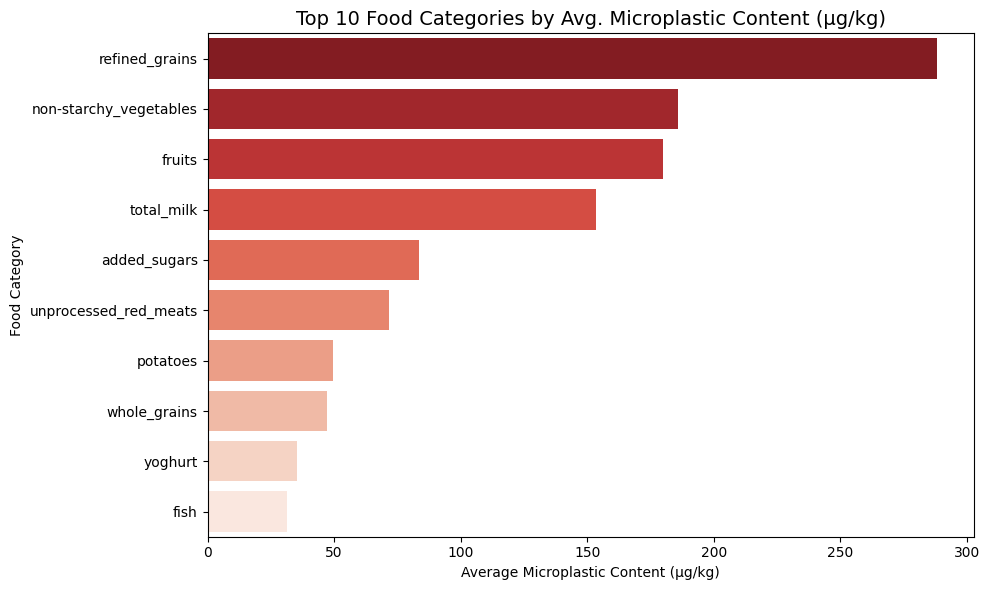

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_foods.values, y=top_10_foods.index, palette='Reds_r')
plt.title('Top 10 Food Categories by Avg. Microplastic Content (μg/kg)', fontsize=14)
plt.xlabel('Average Microplastic Content (μg/kg)')
plt.ylabel('Food Category')
plt.tight_layout()
plt.show()

- Initial Time-Series for a Food Category:
    - Choose one of the top 3 food categories identified in question 3. How has the microplastic content in this specific food category changed over time (1990-2018) globally? Visualize this trend.

In [14]:
fruits_trend = df.groupby("year")["fruits"].median().reset_index()

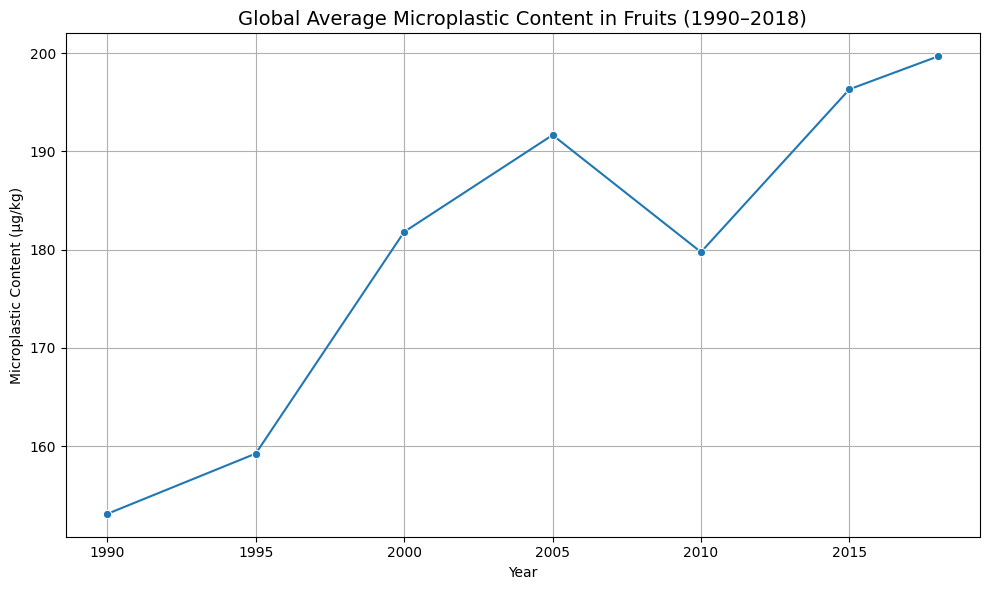

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=fruits_trend, x="year", y="fruits", marker="o")
plt.title("Global Average Microplastic Content in Fruits (1990–2018)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Microplastic Content (μg/kg)")
plt.grid(True)
plt.tight_layout()
plt.show()